# Parte 3: Precio de modelo de Carro

Mariana Ramirez, Santiago Hoyos y Camila Nahuel

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import cross_validate
from sklearn.utils import resample

import warnings
warnings.filterwarnings('ignore')

## Cargar datos

In [ ]:
df = pd.read_csv('LondonCars2014.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9080 entries, 0 to 9079
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Make          9080 non-null   object
 1   Model         9080 non-null   object
 2   Year          9080 non-null   int64 
 3   Mileage       9080 non-null   int64 
 4   Price         9080 non-null   int64 
 5   Body Style    9080 non-null   object
 6   Ex Color      9080 non-null   object
 7   In Color      9080 non-null   object
 8   Engine        9080 non-null   object
 9   Transmission  9080 non-null   object
 10  Doors         9080 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 780.4+ KB


In [ ]:
df.head()

,Make,Model,Year,Mileage,Price,Body Style,Ex Color,In Color,Engine,Transmission,Doors
0,Toyota,Avalon XLE,2014,4725,28995,Sedan,Gray,Black,6 Cyl,Automatic,4
1,Ford,Escape SE,2014,17201,24994,SUV,Silver,Black,4 Cyl,Automatic,4
2,Hyundai,Santa Fe Sport,2014,6279,25998,SUV,Silver,Gray,4 Cyl,Automatic,4
3,Ford,Escape SE,2014,16262,26684,SUV,Black,Black,4 Cyl,Automatic,4
4,Jeep,Grand Cherokee Limited Edition,2014,35572,33440,SUV,Black,Black,6 Cyl,Automatic,4


## a) Selección de marca y modelo


La marca y modelo de carror que seleccionamos es la Lexus RX 350. Ahora vamos a extraer únicamente los datos con esta descripción.

In [ ]:
df = df.loc[df['Make'] == 'Lexus']
df = df.loc[df['Model'] == 'RX 350']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139 entries, 109 to 9057
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Make          139 non-null    object
 1   Model         139 non-null    object
 2   Year          139 non-null    int64 
 3   Mileage       139 non-null    int64 
 4   Price         139 non-null    int64 
 5   Body Style    139 non-null    object
 6   Ex Color      139 non-null    object
 7   In Color      139 non-null    object
 8   Engine        139 non-null    object
 9   Transmission  139 non-null    object
 10  Doors         139 non-null    int64 
dtypes: int64(4), object(7)
memory usage: 13.0+ KB


In [ ]:
df.head()

,Make,Model,Year,Mileage,Price,Body Style,Ex Color,In Color,Engine,Transmission,Doors
109,Lexus,RX 350,2013,17042,39995,SUV,Silver,Black,6 Cyl,Automatic,4
110,Lexus,RX 350,2013,18314,40995,SUV,Silver,Brown,6 Cyl,Automatic,4
121,Lexus,RX 350,2013,17042,39995,SUV,Silver,Black,6 Cyl,Automatic,4
122,Lexus,RX 350,2013,18314,40995,SUV,Silver,Brown,6 Cyl,Automatic,4
239,Lexus,RX 350,2012,27957,35472,SUV,Black,Tan,6 Cyl,Automatic,4


Las variables que podemos tomar para hacer un modelo predictivo del 'Price' de los Lexus RX 350, son 'Mileage' y 'Year'

In [ ]:
y = df[['Price']]
X = df[['Mileage','Year']]

Gráficas de preció VS Mileage y Year

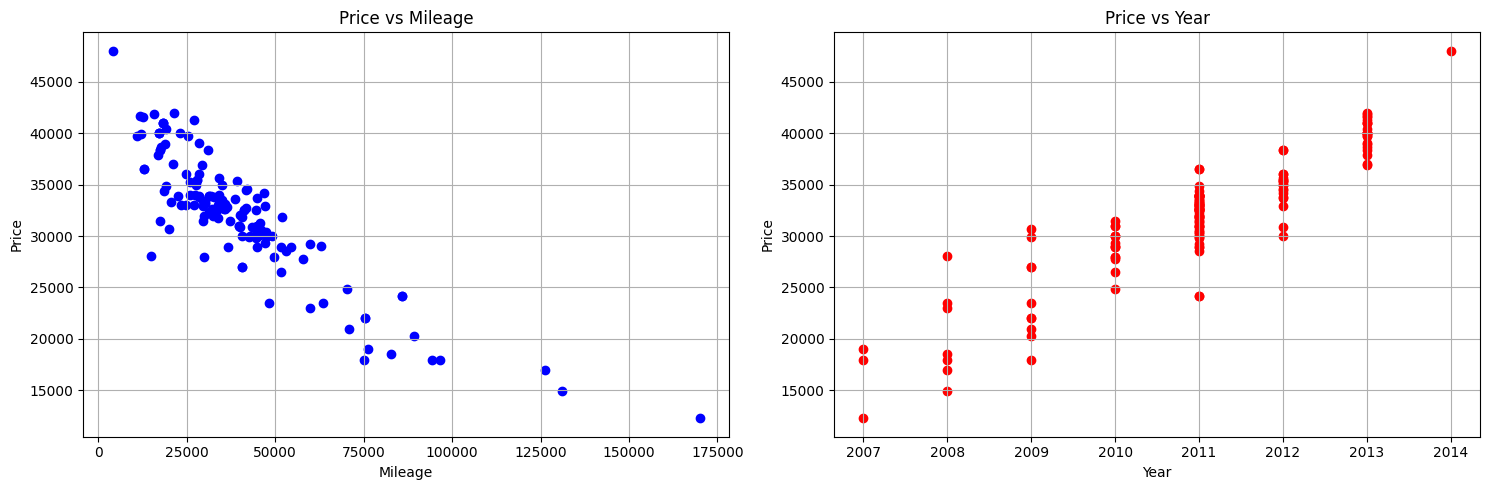

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plotting the first scatter plot in the first subplot
axs[0].scatter(X.iloc[:, 0], y, color='blue', label='Data points')
axs[0].set_xlabel('Mileage')
axs[0].set_ylabel('Price')
axs[0].set_title('Price vs Mileage')
axs[0].grid()

# Plotting the second scatter plot in the second subplot
axs[1].scatter(X.iloc[:, 1], y, color='red', label='Data points')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Price')
axs[1].set_title('Price vs Year')
axs[1].grid()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the combined figure with both plots
plt.show()

Con las tres variables en un único plot

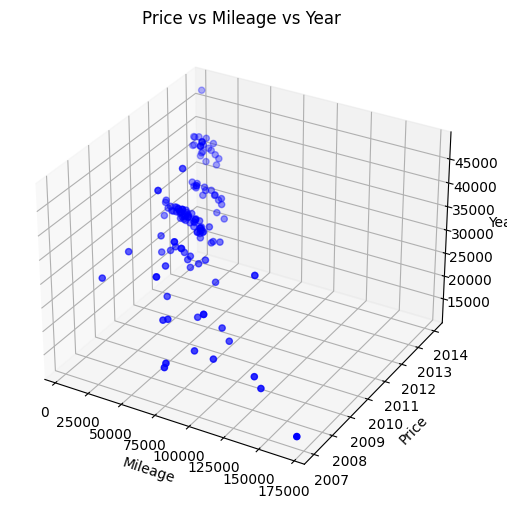

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X.iloc[:, 0], X.iloc[:, 1], y, c='blue', marker='o', label='Data points')
ax.set_xlabel('Mileage')
ax.set_ylabel('Price')
ax.set_zlabel('Year')
ax.set_title('Price vs Mileage vs Year')
ax.grid()

plt.show()

## b) Selección de modelo

In [ ]:
XTrain, XVal, yTrain, yVal = train_test_split(X, y, test_size=0.30, random_state=42)

#### Modelo 1. Regresión Lineal

Basándonos en las dos gráficas anteriores decidimos que un buen modelo de predicción del precio de nuestro marca y modelo de carro puede ser la regresión lineal ya que se ve una relación inversamente proporcional con el 'Mileage' y directamente proporcional con el 'Year'

In [ ]:
regr = LinearRegression()
regr.fit(XTrain, yTrain)
pred = regr.predict(XVal)

In [ ]:
print("RSME: ", np.sqrt(mean_squared_error(yVal, pred)))
print("MAE: ", mean_absolute_error(yVal, pred))
print('\n')
print(pd.Series(regr.coef_[0], index = X.columns))
print('Intercept: ',regr.intercept_)

RSME:  1547.3342660956996
MAE:  1152.963199304949


Mileage      -0.112936
Year       2361.996718
dtype: float64
Intercept:  [-4713410.10078773]


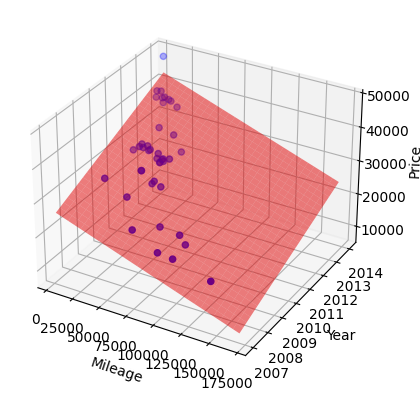

In [ ]:
mileage_range = np.linspace(df['Mileage'].min(), df['Mileage'].max(), 30)
make_range = np.linspace(df['Year'].min(), df['Year'].max(), 30)
mileage_mesh, make_mesh = np.meshgrid(mileage_range, make_range)
predicted_prices = regr.predict(np.array([mileage_mesh.flatten(), make_mesh.flatten()]).T)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(XVal['Mileage'], XVal['Year'], yVal, color='blue', label='Validation Data')
ax.plot_surface(mileage_mesh, make_mesh, predicted_prices.reshape(mileage_mesh.shape), color='r', alpha=0.5, label='Regression Plane')
ax.set_xlabel('Mileage')
ax.set_ylabel('Year')
ax.set_zlabel('Price')

plt.show()

### Modelo 2. Regresión polinomial grado 2

El segundo modelo con el que vamos a compara nuestra regresión lineal será una regresión de grado 2. Las relaciones pueden que no sean lineales sino polinomiales.

In [ ]:
degree = 2  # Choose the degree of the polynomial
poly = PolynomialFeatures(degree)
X_poly_train = poly.fit_transform(XTrain)
X_poly_val = poly.transform(XVal)

# Fitting Polynomial Regression
poly_regr = LinearRegression()
poly_regr.fit(X_poly_train, yTrain)
pred1 = poly_regr.predict(X_poly_val)

In [ ]:
print("RMSE: ", np.sqrt(mean_squared_error(yVal, pred1)))
print("MAE: ", mean_absolute_error(yVal, pred1))
print('\n')
print(poly_regr.coef_)
#print(pd.Series(poly_regr.coef_, index = X.columns))
print('Intercept: ',poly_regr.intercept_)

RSME:  1359.2279708563913
MAE:  1085.1166071707294


[[ 0.00000000e+00  2.76569295e+01  8.01446061e+04  1.22357477e-07
  -1.38324875e-02 -1.92310782e+01]]
Intercept:  [-83360072.73137675]


Como podemos ver ambos modelos dan un alto RSME y MAE sin embargo es claro que se debe a nuestra variables (todas) estan en escalas muy altas, es decir que ninguna baja de los miles. Por lo tanto, podemos considerar estos errores como $10^{-3}$ y vemos que ya estarían más cercanos a 1.

Con la anterior consideración, el mejor modelo sería la regresión polinomial de grado 2 y será este el que continuaremos mejorando.

### Regularización con validación cruzada

#### Ridge

In [ ]:
lambdas = 10**np.linspace(100,-2,10000)
ridgecv = RidgeCV(alphas = lambdas)
ridgecv.fit(X_poly_train, yTrain)
ridgecv.alpha_

3627.0701532043595

In [ ]:
ridge = Ridge(alpha = ridgecv.alpha_)
ridge.fit(X_poly_train, yTrain)
pred = ridge.predict(X_poly_val)

print("RMSE: ", np.sqrt(mean_squared_error(yVal, pred)))
print("MAE: ", mean_absolute_error(yVal, pred))
print('\n')
print(ridge.coef_)
print('Intercept: ',ridge.intercept_)

RSME:  1349.5624687096097
MAE:  1072.557099493808


[[ 0.00000000e+00  1.96244738e+01 -1.60251825e-04  2.23205432e-07
  -9.84171491e-03  6.60186605e-01]]
Intercept:  [-2631839.89727145]


#### Lasso

In [ ]:
lassocv = LassoCV(alphas = lambdas, tol=1000)
lassocv.fit(X_poly_train,yTrain.values.ravel())
lassocv.alpha_

0.01

In [ ]:
lasso = Lasso(alpha = lassocv.alpha_)
lasso.fit(X_poly_train, yTrain.values.ravel())
pred = lasso.predict(X_poly_val)

print("RMSE: ", np.sqrt(mean_squared_error(yVal, pred)))
print("MAE: ", mean_absolute_error(yVal, pred))
print('\n')
print(lasso.coef_)
print('Intercept: ',lasso.intercept_)

RSME:  1373.4922995071202
MAE:  1065.1227599417437


[ 0.00000000e+00 -1.72930080e-01  1.62659588e+03  5.21125295e-07
 -8.46125195e-06  1.57555640e-01]
Intercept:  -3869746.47770396


## c) Validación del Modelo

La validación del modelo la haremos con todos los datos combinados.

In [ ]:
X_poly_combined = poly.fit_transform(X)
cv = cross_validate(poly_regr,X_poly_combined, y,
                    scoring=('neg_mean_absolute_error','neg_root_mean_squared_error'),
                    return_train_score=True, error_score='raise')


train_rmse = -cv['train_neg_root_mean_squared_error']
train_mae = -cv['train_neg_mean_absolute_error']
test_rmse = -cv['test_neg_root_mean_squared_error']
test_mae = -cv['test_neg_mean_absolute_error']

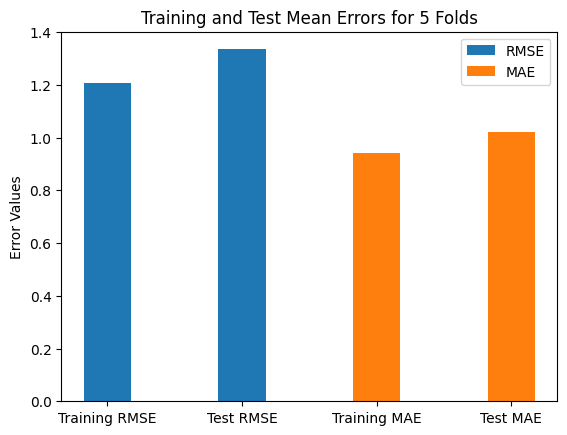

In [ ]:
labels = ['Training RMSE', 'Test RMSE', 'Training MAE', 'Test MAE']
x = np.arange(len(labels))

fig, ax = plt.subplots()

ax.bar(x[:2], [train_rmse.mean()/1000, test_rmse.mean()/1000], 0.35, label='RMSE')
ax.bar(x[2:], [train_mae.mean()/1000, test_mae.mean()/1000], 0.35, label='MAE', align='center')

ax.set_ylabel('Error Values')
ax.set_title('Training and Test Mean Errors for 5 Folds')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


Esta gráfica nos muetra que en general el promedió de nuestro errores al haver cross validation con los datos de entrenamiento o de validación para hacer predicciónes son muy cercanos. Es decir que nuestro modelo hace predicciones similares en para ambos conjuntos de datos con errores pequeños en ambos.

## d) Resultados

Documente claramente todas las etapas del análisis, desde la
exploración de datos hasta la evaluación del modelo, y presente sus resultados de una manera coherente y fácil de seguir.

**Exploración de Datos:**

* Cargamos el conjunto de datos LondonCars2014 y filtramos los vehículos de la marca Lexus y el modelo RX 350.
* Visualizamos los datos a través de gráficos de dispersión para comprender las relaciones entre las variables clave: Mileage, Year y Price.
* Observamos una relación inversamente proporcional entre Mileage y Price, y una relación directamente proporcional entre Year y Price.


**Modelo de Regresión Lineal:**

Elegimos un modelo de regresión lineal como punto de partida debido a las relaciones identificadas.

* Dividimos los datos en conjuntos de entrenamiento y validación (70% entrenamiento, 30% validación).
* Entrenamos el modelo de regresión lineal en los datos de entrenamiento y evaluamos su rendimiento en los datos de validación.
* Calculamos las métricas de evaluación, incluido el Error Cuadrático Medio de la Raíz (RMSE) y el Error Absoluto Medio (MAE).
* Observamos que las métricas tenían valores altos debido a las escalas de las variables.

**Modelo de Regresión Polinomial (Grado 2):**

Para abordar la no linealidad de los datos, aplicamos un modelo de regresión polinomial de grado 2.

* Transformamos las variables predictoras con un grado polinómico de 2 y entrenamos el modelo polinomial.
* Evaluamos el rendimiento del modelo polinomial en los datos de validación.
* Aunque las métricas mejoraron, aún teníamos valores altos debido a la escala de las variables, por lo que consideramos estos errores como 10^-3 y vemos que estarían más cercanos a 1.
* Con la anterior consideración, el mejor modelo sería la regresión polinomial de grado 2 y se contiuó mejorando.

**Validación Cruzada**

Realizamos validación cruzada en los modelos para evaluar su rendimiento en todos los datos disponibles.

**Bootstraping**

Por último, para validar al precisión y robustez de nuestro modelo vamos a plocar bootstraping que nos permitirá ver la distribución del error cuadrático medio raiz.

In [ ]:
def bootstrap_mse(model, X, y, num_samples=1000):
    mse_samples = []
    confidence_level=0.95

    for _ in range(num_samples):
        X_sampled, y_sampled = resample(X, y, replace=True, random_state=None)
        model.fit(X_sampled, y_sampled)
        y_pred = model.predict(X_poly_val)

        # MSE de bootstrap
        mse = np.sqrt(mean_squared_error(yVal, y_pred))
        mse_samples.append(mse)

    alpha = 1 - confidence_level
    lower_percentile = alpha / 2 * 100
    upper_percentile = (1 - alpha / 2) * 100
    lower_bound = np.percentile(mse_samples, lower_percentile)
    upper_bound = np.percentile(mse_samples, upper_percentile)

    return np.array(mse_samples), lower_bound, upper_bound

In [ ]:
X_poly_train = poly.fit_transform(XTrain)
lasso_cv = LassoCV(alphas=lambdas,tol=0.01, max_iter=100000)
lasso_cv.fit(X_poly_train, yTrain.values.ravel())
alpha = lasso_cv.alpha_

lasso_model = Lasso(alpha=alpha)
mse_samples,lower_bound,upper_bound = bootstrap_mse(lasso_model, X_poly_train, yTrain)

In [ ]:
print('Lower Bound:', lower_bound,"  Upper Bound: ",upper_bound)

Lower Bound: 1322.7863210070489   Upper Bound:  1584.147853973369


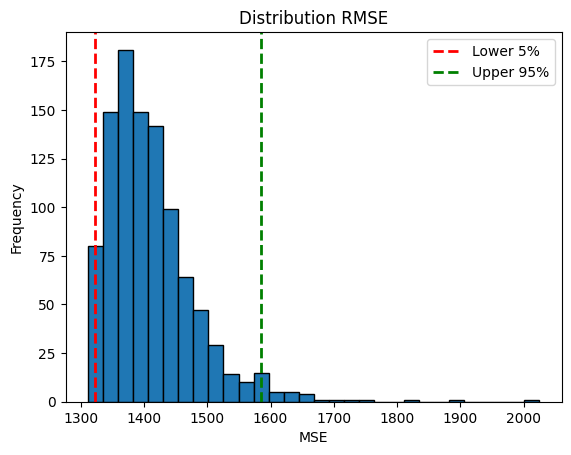

In [ ]:
plt.hist(mse_samples, bins=30, edgecolor='k')
plt.title('Distribution RMSE')
plt.xlabel('MSE')
plt.ylabel('Frequency')

plt.axvline(lower_bound, color='r', linestyle='dashed', linewidth=2, label=f'Lower {int((1 - 0.95) * 100)}%')
plt.axvline(upper_bound, color='g', linestyle='dashed', linewidth=2, label=f'Upper {int(0.95 * 100)}%')

plt.legend()
plt.show()

Esta última gráfica nos muestra que en nuestro modelo la mayor los errores estan entre los valores de 1322.8 y 1584.1 para el 95% de nuestros datos. Lo que podemos decir es que es un modelo robusto y bastante preciso ya que la mayoría de los errores estan en un rango similar.